# Prediction for Survival of the Titanic disaster - Feature Engineering

In [1]:
import re

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score

from autofeatselect import CorrelationCalculator, FeatureSelector, AutoFeatureSelect

## Prepare the data set

In [2]:
# load the train and evaluation set
train = pd.read_csv('../00_data/train.csv')
pred = pd.read_csv('../00_data/test.csv')

In [3]:
# display the training data
print(train.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [4]:
# display the evaluation set
print(pred.head())

   PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S  


In [5]:
# display info
print(train.info())
print(pred.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pcl

In [6]:
# extracts the title (Mr, Ms, etc) from the name variable
def get_title(passenger):
    if re.search('Mr', passenger):
        return 'Mr'
    elif re.search('Mrs', passenger):
        return 'Mrs'
    elif re.search('Miss', passenger):
        return 'Miss'
    elif re.search('Master', passenger):
        return 'Master'
    else:
        return 'Other'

train['Title'] = train['Name'].apply(get_title)
pred['Title'] = pred['Name'].apply(get_title)

print(train.head())
print(pred.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked Title  
0      0         A/5 21171   7.2500   NaN        S    Mr  
1      0          PC 17599  71.2833   C85        C    Mr  
2      0  STON/O2. 3101282   7.9250   NaN        S  Miss  
3      0            113803  53.1000  C123        S    Mr  
4      0            37345

In [7]:
# drop unnecessary variables
train.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
pred.drop(['Name', 'Ticket'], axis=1, inplace=True)

print(train.head())
print(pred.head())

   Survived  Pclass     Sex   Age  SibSp  Parch     Fare Cabin Embarked Title
0         0       3    male  22.0      1      0   7.2500   NaN        S    Mr
1         1       1  female  38.0      1      0  71.2833   C85        C    Mr
2         1       3  female  26.0      0      0   7.9250   NaN        S  Miss
3         1       1  female  35.0      1      0  53.1000  C123        S    Mr
4         0       3    male  35.0      0      0   8.0500   NaN        S    Mr
   PassengerId  Pclass     Sex   Age  SibSp  Parch     Fare Cabin Embarked  \
0          892       3    male  34.5      0      0   7.8292   NaN        Q   
1          893       3  female  47.0      1      0   7.0000   NaN        S   
2          894       2    male  62.0      0      0   9.6875   NaN        Q   
3          895       3    male  27.0      0      0   8.6625   NaN        S   
4          896       3  female  22.0      1      1  12.2875   NaN        S   

  Title  
0    Mr  
1    Mr  
2    Mr  
3    Mr  
4    Mr  


In [8]:
# save the train and the evaluation set
train.to_csv('titanic_train.csv', index=False)
pred.to_csv('titanic_test.csv', index=False)

## Data exploration

### Find numerical and categorical variables

In [9]:
target = 'Survived'

In [10]:
# train set
vars_num = [var for var in train.columns if train[var].dtype != object and var != target]

vars_cat = [var for var in train.columns if train[var].dtype == object]

print(f'number of numerical variables in train set: {len(vars_num)}: {vars_num}')
print(f'number of categorical variables in train set: {len(vars_cat)}: {vars_cat}')

number of numerical variables in train set: 5: ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
number of categorical variables in train set: 4: ['Sex', 'Cabin', 'Embarked', 'Title']


In [11]:
# evaluation set
pred_vars_num = [var for var in pred.columns if pred[var].dtype != object and var != target]

pred_vars_cat = [var for var in pred.columns if pred[var].dtype == object]

print(f'number of numerical variables in evaluation set: {len(pred_vars_num)}: {pred_vars_num}')
print(f'number of categorical variables in evaluation set: {len(pred_vars_cat)}: {pred_vars_cat}')

number of numerical variables in evaluation set: 6: ['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
number of categorical variables in evaluation set: 4: ['Sex', 'Cabin', 'Embarked', 'Title']


### Find missing values in variables

In [12]:
# train set
# first in numerical variables
print('Train set: Missing values in numerical vars')
print(train[vars_num].isnull().mean())
vars_num_nan = [var for var in vars_num if train[var].isna().sum() > 0]
print(vars_num_nan)

# then in categorical variables
print('Train set: Missing values in categorical vars')
print(train[vars_cat].isnull().mean())
vars_cat_nan = [var for var in vars_cat if train[var].isna().sum() > 0]
print(vars_cat_nan)

Train set: Missing values in numerical vars
Pclass    0.000000
Age       0.198653
SibSp     0.000000
Parch     0.000000
Fare      0.000000
dtype: float64
['Age']
Train set: Missing values in categorical vars
Sex         0.000000
Cabin       0.771044
Embarked    0.002245
Title       0.000000
dtype: float64
['Cabin', 'Embarked']


In [13]:
# evaluation set
# first in numerical variables
print('Evaluation set: Missing values in numerical vars')
print(pred[pred_vars_num].isnull().mean())
pred_vars_num_nan = [var for var in pred_vars_num if pred[var].isna().sum() > 0]
print(pred_vars_num_nan)

# then in categorical variables
print('Evaluation set: Missing values in categorical vars')
print(pred[pred_vars_cat].isnull().mean())
pred_vars_cat_nan = [var for var in pred_vars_cat if pred[var].isna().sum() > 0]
print(pred_vars_cat_nan)

Evaluation set: Missing values in numerical vars
PassengerId    0.000000
Pclass         0.000000
Age            0.205742
SibSp          0.000000
Parch          0.000000
Fare           0.002392
dtype: float64
['Age', 'Fare']
Evaluation set: Missing values in categorical vars
Sex         0.000000
Cabin       0.782297
Embarked    0.000000
Title       0.000000
dtype: float64
['Cabin']


### Determine cardinality of categorical variables

In [14]:
# train set
print(train[vars_cat].nunique())

Sex           2
Cabin       147
Embarked      3
Title         4
dtype: int64


In [15]:
# evaluation set
print(train[pred_vars_cat].nunique())

Sex           2
Cabin       147
Embarked      3
Title         4
dtype: int64


### Determine the distribution of numerical variables

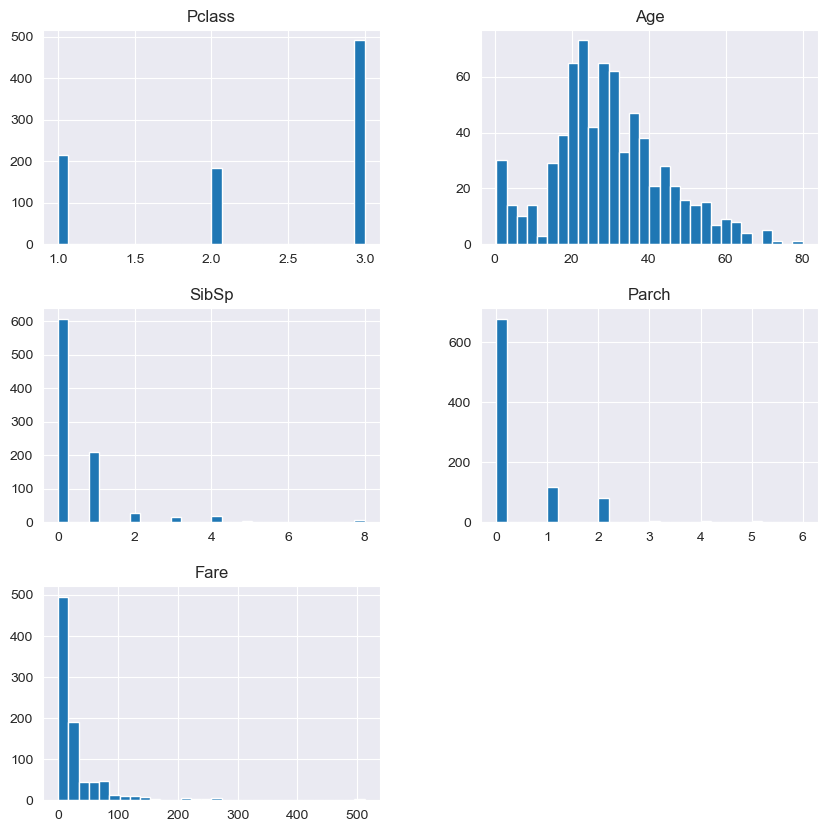

In [16]:
# train set
train[vars_num].hist(bins=30, figsize=(10, 10))
plt.show()

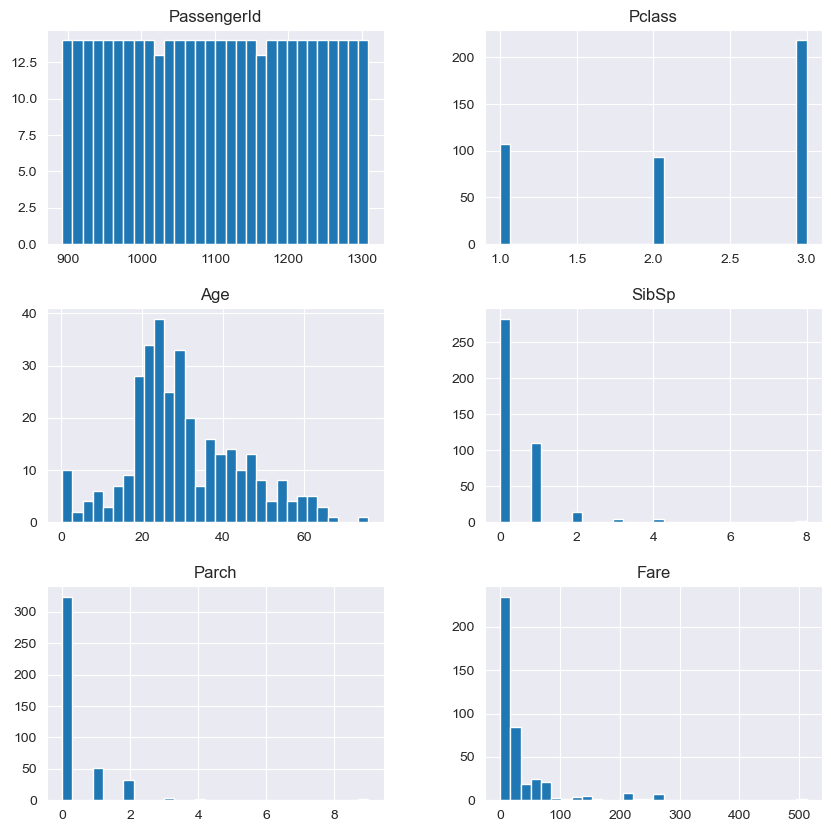

In [17]:
# evaluation set
pred[pred_vars_num].hist(bins=30, figsize=(10, 10))
plt.show()

## Separate data into train and test

In [18]:
## Separate data (train data) into train and test (the evaluation set is not labeled and the real data to predict)
X_train, X_test, y_train, y_test = train_test_split(
    train.drop('Survived', axis=1), train['Survived'], test_size=0.2, random_state=0)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(712, 9)
(712,)
(179, 9)
(179,)


In [19]:
X_pred = pred.copy()

## Feature Engineering

### Extract only the letter (and drop the number) from the variable Cabin

In [20]:
# train and test set
X_train['Cabin'] = X_train['Cabin'].str[0] # captures the first letter
X_test['Cabin'] = X_test['Cabin'].str[0] # captures the first letter

X_train['Cabin'].unique()

array([nan, 'C', 'B', 'A', 'G', 'E', 'D', 'F', 'T'], dtype=object)

In [21]:
# evaluation set
X_pred['Cabin'] = X_pred['Cabin'].str[0] # captures the first letter

X_pred['Cabin'].unique()

array([nan, 'B', 'E', 'A', 'C', 'D', 'F', 'G'], dtype=object)

### Fill in Missing data in numerical variables:

In [22]:
# train, test, pred
for var in ['Age', 'Fare']:

    # add missing indicator
    X_train[var+'_NA'] = np.where(X_train[var].isnull(), 1, 0)
    X_test[var+'_NA'] = np.where(X_test[var].isnull(), 1, 0)
    X_pred[var+'_NA'] = np.where(X_pred[var].isnull(), 1, 0)

    # replace NaN by median
    median_val = X_train[var].median()

    X_train[var].fillna(median_val, inplace=True)
    X_test[var].fillna(median_val, inplace=True)
    X_pred[var].fillna(median_val, inplace=True)

print(X_train[['Age', 'Fare']].isnull().sum())
print(X_test[['Age', 'Fare']].isnull().sum())
print(X_pred[['Age', 'Fare']].isnull().sum())

Age     0
Fare    0
dtype: int64
Age     0
Fare    0
dtype: int64
Age     0
Fare    0
dtype: int64


### Replace Missing data in categorical variables with the string **Missing**

In [23]:
for var in vars_cat_nan:
    X_train[var] = X_train[var].fillna('Missing')
    X_test[var] = X_test[var].fillna('Missing')
    
for var in pred_vars_cat_nan:
    X_pred[var] = X_pred[var].fillna('Missing')
    
print(X_train.isna().sum())
print(X_test.isna().sum())
print(X_pred.isna().sum())

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Cabin       0
Embarked    0
Title       0
Age_NA      0
Fare_NA     0
dtype: int64
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Cabin       0
Embarked    0
Title       0
Age_NA      0
Fare_NA     0
dtype: int64
PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Cabin          0
Embarked       0
Title          0
Age_NA         0
Fare_NA        0
dtype: int64


### Remove rare labels in categorical variables

- remove labels present in less than 5 % of the passengers

In [24]:
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title,Age_NA,Fare_NA
140,3,female,29.0,0,2,15.2458,Missing,C,Mr,1,0
439,2,male,31.0,0,0,10.5000,Missing,S,Mr,0,0
817,2,male,31.0,1,1,37.0042,Missing,C,Mr,0,0
378,3,male,20.0,0,0,4.0125,Missing,C,Mr,0,0
491,3,male,21.0,0,0,7.2500,Missing,S,Mr,0,0


In [25]:
X_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title,Age_NA,Fare_NA
495,3,male,29.0,0,0,14.4583,Missing,C,Mr,1,0
648,3,male,29.0,0,0,7.5500,Missing,S,Mr,1,0
278,3,male,7.0,4,1,29.1250,Missing,Q,Master,0,0
31,1,female,29.0,1,0,146.5208,B,C,Mr,1,0
255,3,female,29.0,0,2,15.2458,Missing,C,Mr,0,0


In [26]:
X_pred.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title,Age_NA,Fare_NA
0,892,3,male,34.5,0,0,7.8292,Missing,Q,Mr,0,0
1,893,3,female,47.0,1,0,7.0000,Missing,S,Mr,0,0
2,894,2,male,62.0,0,0,9.6875,Missing,Q,Mr,0,0
3,895,3,male,27.0,0,0,8.6625,Missing,S,Mr,0,0
4,896,3,female,22.0,1,1,12.2875,Missing,S,Mr,0,0


#### TODO

### Selecting the most important features - approach 1

#### Detect highly correlated numerical and categorcial features and remove them

In [33]:
# detect correlated numerical features
print(vars_num)
num_static_vars = ['Pclass']
corr_vars_num, num_remove_list = CorrelationCalculator.numeric_correlations(X_train, 
                                                                            features=vars_num, 
                                                                            static_features=num_static_vars, 
                                                                            threshold=0.9)
print(corr_vars_num)
print(num_remove_list)

        i       j  correlation_score
4    Fare  Pclass           0.534776
13  Parch   SibSp           0.423676
1     Age  Pclass           0.337849
7   SibSp     Age           0.222256
19   Fare   Parch           0.213608
8   Parch     Age           0.167534
14   Fare   SibSp           0.145538
9    Fare     Age           0.098592
2   SibSp  Pclass           0.093648
3   Parch  Pclass           0.017336
[]


In [35]:
# detect correlated categorical features
print(vars_cat)
cat_static_vars = ['Sex', 'Title','Cabin']
corr_vars_cat, cat_remove_list = CorrelationCalculator.categorical_correlations(X_train, 
                                                                            features=vars_cat, 
                                                                            static_features=cat_static_vars, 
                                                                            threshold=0.9)
print(corr_vars_cat)
print(cat_remove_list)

['Sex', 'Cabin', 'Embarked', 'Title']
          i         j  correlation_score
0     Cabin       Sex           0.191139
1  Embarked       Sex           0.136405
2  Embarked     Cabin           0.173942
3     Title       Sex           0.691407
4     Title     Cabin           0.124394
5     Title  Embarked           0.102817
[]


In [36]:
# remove correlated features
num_feats = [v for v in vars_num if v not in num_remove_list]
cat_feats = [v for v in vars_cat if v not in cat_remove_list]

In [37]:
print(num_feats)
print(cat_feats)

['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
['Sex', 'Cabin', 'Embarked', 'Title']


#### Apply feature selection by calculation of importance scores

##### LightGBM

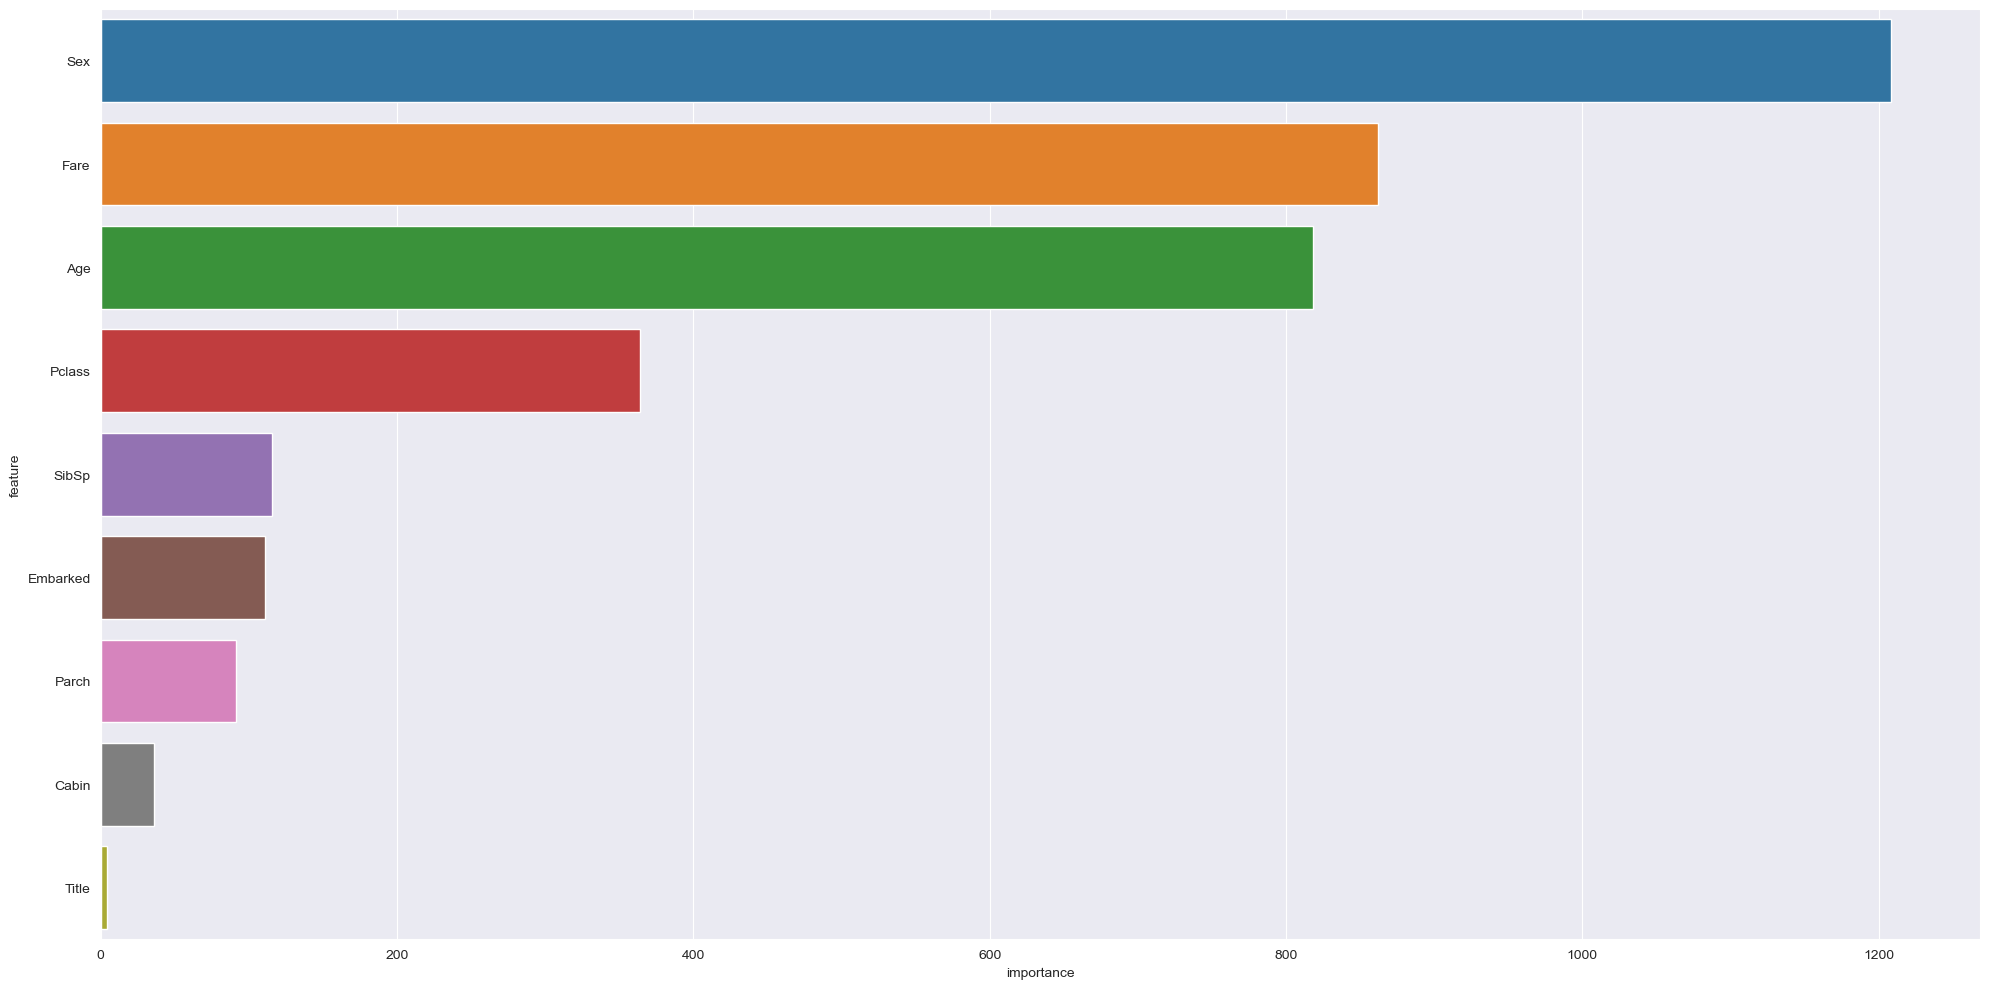

In [38]:
#Create Feature Selector Object
feat_selector = FeatureSelector(modeling_type='classification',
                                X_train=X_train, y_train=y_train,
                                X_test=X_test, y_test=y_test,
                                numeric_columns=num_feats,
                                categorical_columns=cat_feats,
                                seed=24)

#Note: Hyperparameters and objective function of LightGBM can be changed.
lgbm_importance_df = feat_selector.lgbm_importance(hyperparam_dict=None,
                                                   objective=None,
                                                   return_plot=True)

##### RecursiveFeatureElimination

In [42]:
rfecv_importance_df = feat_selector.rfecv_importance(lgbm_hyperparams=None,
                                                     rfecv_hyperparams=None,
                                                     return_plot=False)
print(rfecv_importance_df)

    feature  importance
0    Pclass           1
1       Age           1
2     SibSp           1
3     Parch           1
4      Fare           1
5       Sex           1
6     Cabin           1
7  Embarked           1
8     Title           1


### Selecting the most important features - approach 2

In [43]:
#Create AutoFeatureSelect class
feat_selector = AutoFeatureSelect(modeling_type='classification',
                                  X_train=X_train,
                                  y_train=y_train,
                                  X_test=X_test,
                                  y_test=y_test,
                                  numeric_columns=vars_num,
                                  categorical_columns=vars_cat,
                                  seed=24)

#Detect Correlated Features
corr_features = feat_selector.calculate_correlated_features(static_features=None,
                                                            num_threshold=0.9,
                                                            cat_threshold=0.9)
#Drop Correlated Features
feat_selector.drop_correlated_features()

#Determine Selection Methods to Apply
#Options: 'lgbm', 'xgb', 'rf','perimp', 'rfecv', 'boruta', 'lassocv'
#Note: Hyperparameters of all methods can be changed
selection_methods = ['lgbm', 'xgb', 'rf','perimp', 'rfecv', 'boruta']
final_importance_df = feat_selector.apply_feature_selection(selection_methods=selection_methods,
                                                            lgbm_hyperparams=None,
                                                            xgb_hyperparams=None,
                                                            rf_hyperparams=None,
                                                            lassocv_hyperparams=None,
                                                            perimp_hyperparams=None,
                                                            rfecv_hyperparams=None,
                                                            boruta_hyperparams=None)

#Print Results
final_importance_df.head()

LightGBM Feature Importance is finished
XGBoost Feature Importance is finished
Random Forest Feature Importance is finished
Permutation Importance Feature Importance is finished
RFECV Feature Importance is finished
An error occurred: module 'numpy' has no attribute 'int'.
`np.int` was a deprecated alias for the builtin `int`. To avoid this error in existing code, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
The aliases was originally deprecated in NumPy 1.20; for more details and guidance see the original release note at:
    https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


,feature,lgbm_importance,xgb_importance,rf_importance,permutation_importance,rfecv_rankings
0,Sex,1207.890333,0.333235,0.371168,0.160894,1
1,Fare,862.082288,0.222344,0.121148,0.048045,1
2,Age,818.113069,0.177542,0.075491,0.042458,1
3,Pclass,364.347350,0.092186,0.115687,0.077095,1
4,SibSp,115.787649,0.057584,0.064606,0.003352,1
